In [1]:
import os
import re
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# df = pd.read_csv('Corona_NLP_train.csv')
# df.head()

# Try reading the file with a different encoding
df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
# Alternative encodings you can try if latin-1 doesn't work:
# encoding='iso-8859-1'
# encoding='cp1252'
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [5]:
list(df.columns)

['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

In [6]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [7]:
label_types=df.Sentiment.unique().astype(str)
print(label_types)

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [8]:
label_count=df.Sentiment.value_counts()
print(label_count)

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


Labels in dataset:  ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


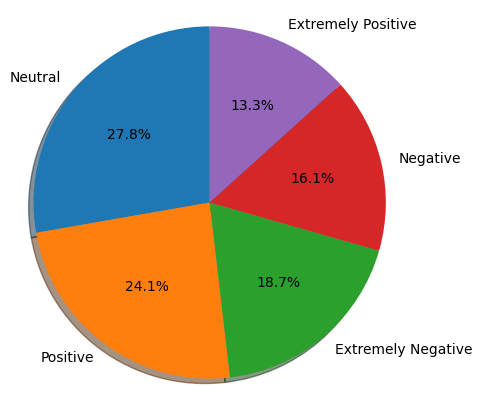

In [13]:
def pie_chart(dataf):
    label_types=df.Sentiment.unique().astype(str)
    label_count=df.Sentiment.value_counts()
    print("Labels in dataset: ",label_types)
    print(label_count)

    labels=label_types
    sizes=[count for count in label_count]
    fig=plt.figure(figsize=(5,5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.show()


pie_chart(df)

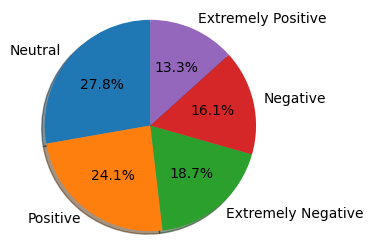

In [12]:
labels = label_types
sizes = [count for count in label_count]
fig = plt.figure(figsize = (3,3))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow = True, startangle=90)
plt.axis('equal')
plt.show()

In [14]:
df[df['Sentiment']=='Negative']['OriginalTweet'].shape

(9917,)

In [15]:
df[df.Sentiment=='Positive']['OriginalTweet'].shape

(11422,)

In [24]:
all_positive_tweets=list(df[df.Sentiment=='Positive']['OriginalTweet'].astype(str))
all_negative_tweets=list(df[df.Sentiment=='Negative']['OriginalTweet'].astype(str))


In [25]:
print("Positive tweets:")
for tweet in all_positive_tweets[:5]:  # Print first 5 positive tweets as example
    print(tweet)


Positive tweets:
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
My food stock is not the only one which is empty...

PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. 
Stay calm, stay safe.

#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU
Cashier at grocery store was sharing his insights on #Covid_19 To

In [26]:
print("\nNegative tweets:") 
for tweet in all_negative_tweets[:5]:  # Print first 5 negative tweets as example
    print(tweet)


Negative tweets:
For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona
@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer
In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn
Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K

To file a complaint (use the word"Overcharge") https://t.co/MdMm

In [27]:
positive_train, positive_test = train_test_split(all_positive_tweets, test_size = 0.2, random_state = 13)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size = 0.2, random_state = 13)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(f"The size of training dataset is: {len(positive_train)+ len(negative_train)}")
print("The size of test dataset is:", len(positive_test)+ len(negative_test))

The size of training dataset is: 17070
The size of test dataset is: 4269


In [30]:
# Print a random positive tweet in green and a random negative tweet in red
# Using ANSI color codes: 92m for green, 91m for red
print('\033[92m' + all_positive_tweets[random.randint(0,13656)])  # Random positive tweet from training set
print('\033[91m' + all_negative_tweets[random.randint(0,3414)])   # Random negative tweet from training set

All those people now selling sanitizers at exorbitant prices I'm blacklisting y'all, I've realised you won't be faithful business partners, you'll enjoy now but after this outbreak is over no other business will come your way. Crooks!.. #COVID19Ghana #COVID2019
Women wearing mark shop at a supermarket in Foster City, San Francisco Bay Area, the US, March 9, 2020. There were 605 confirmed cases of COVID-19 in the US and 22 died as of 20:00, EDT, on March 9. (Photo by Liu Guanguan/CNSPHOTO) https://t.co/nw583b2oUt


### **How Can a Machine Understand a Tweet?**

A machine can understand a tweet by recognizing the words that form a string of characters before processing the natural language. The meaning of the text can be interpreted by analyzing the words.

This is where **tokenization** is essential for NLP (text data), which breaks down the text into tokens (words).

### **What is Tokenization?**

- **Word Tokenization**: Splitting large text samples into individual words.

In [31]:
# Get the 13th positive tweet and split it into individual words
token = all_positive_tweets[12]  # Get 13th positive tweet
token1 = token.split()  # Split tweet into words
print("Words in the tweet:", token1)  # Print the tokenized words

Words in the tweet: ['Now', 'I', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged!', '?', '#CoronavirusOutbreak', '#COVID2019', 'https://t.co/krTCGiUHQS']


### **Note:**
The `split()` function does not consider punctuation as a separate token.

### **What is a Regular Expression and What Makes it Important?**

- A **regular expression** is a notation used to represent patterns in strings.
- It is a series of characters that define an abstract search pattern.
- It serves to search and extract information from texts.

Regex is commonly used in:
- **Google Analytics** for URL matching.
- **Supporting search and replace** in popular editors like Sublime Text, Notepad++, Google Docs, and Microsoft Word.

### **Example:**
Regular expression for an email address:



In [33]:
# Use regex pattern [\w]+ to find all word characters (letters, digits, underscores)
# \w matches any word character
# + means match one or more occurrences
# This will split the tweet into tokens while removing punctuation
tokens = re.findall(r"[\w]+", token)

# Print the tokenized words extracted using regex
print("Using regexes: ", tokens)

Using regexes:  ['Now', 'I', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', 'CoronavirusOutbreak', 'COVID2019', 'https', 't', 'co', 'krTCGiUHQS']


### **Using `re.findall()` for Pattern Matching**

- The function `re.findall()` finds all the words that match the pattern passed and stores them in a list.
- The **"w"** represents "any word character," which typically means alphanumeric (letters, numbers) and underscores (_).
- The **"+"** means "one or more occurrences" of the preceding element.
- `[\w']+` signals that the function should find all the alphanumeric characters (including apostrophes) until another character is encountered.


### **Natural Language Toolkit (NLTK) for Text Processing**
Python has modules for collecting, handling, and processing text data. One popular package is **Natural Language Toolkit (NLTK)**.

- **`nltk.tokenize`** module contains the **`word_tokenize()`** method, which splits a sentence into tokens (words).


In [38]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download(['punkt', 'punkt_tab'])  # Download required tokenizer data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
w = word_tokenize(token)
print("Using NLTK: ", w)

Using NLTK:  ['Now', 'I', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', '#', 'CoronavirusOutbreak', '#', 'COVID2019', 'https', ':', '//t.co/krTCGiUHQS']


In [39]:
# Split text into sentences using 3 different methods:

# Method 1: Basic string split on periods (commented out)
#token = all_positive_tweets[12].split('. ')

# Method 2: Using regex to split on sentence endings (.!?) followed by space
token1 = re.compile('[.!?] ').split(token)
token1  # Display the sentence splits

# Method 3: Using NLTK's sentence tokenizer
from nltk.tokenize import sent_tokenize
sentence_splits = sent_tokenize(token)  # Split text into sentences using NLTK

In [41]:
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [45]:
# Remove URLs and hashtag symbols from text
# Pattern for matching URLs (http/https)
pattern_url = r'https?://[^s\n\r]+'
# Pattern for matching hashtag symbol
pattern_hashtag = r'#'

# First remove URLs and replace with space
text_no_urls = re.sub(pattern_url, " ", token)
# Then remove hashtag symbols and replace with space
text_cleaned = re.sub(pattern_hashtag, " ", text_no_urls)

# Print the cleaned text
print(text_cleaned)

Now I can go to the supermarket like this without being judged! ?  CoronavirusOutbreak  COVID2019  


In [47]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens = tokenizer.tokenize(text_cleaned)
print(tweet_tokens)

['now', 'i', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', 'coronavirusoutbreak', 'covid', '2019']


In [49]:
nltk.download("stopwords")  # Download stopwords corpus (fixed typo in name)
sw = stopwords.words("english")  # Get English stopwords (fixed case)

# Remove stopwords from tweet tokens
# Step 1: Create an empty list to store tokens without stopwords
tokens_no_stopwords = []

# Step 2: Loop through each word in the tokenized tweet
for word in tweet_tokens:
    # Step 3: Check if the word is NOT in the stopwords list
    if word not in sw:
        # Step 4: If word is not a stopword, append it to our list
        tokens_no_stopwords.append(word)

# The above is equivalent to the list comprehension:
# tokens_no_stopwords = [word for word in tweet_tokens if word not in sw]

print("Stopwords:", sw)  # Print stopwords list
print("\n", string.punctuation)  # Print punctuation (fixed escape sequence)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [51]:
# string.punctuation contains all ASCII punctuation characters:
# !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# We use it to remove punctuation from tweets
tweet_clean = []
for word in tweet_tokens:
    # Check if word is not a stopword and not a punctuation character
    if(word not in sw and word not in string.punctuation):
        # Only append words that are not stopwords or punctuation
        tweet_clean.append(word)
print(tweet_clean)

['go', 'supermarket', 'like', 'without', 'judged', 'coronavirusoutbreak', 'covid', '2019']


In [53]:
# Stemming & lemmatization try out
#have, having, had --> have

stemmer = PorterStemmer()
tweet_Stem = []

for word in tweet_clean:
    stemmed_word = stemmer.stem(word)
    tweet_Stem.append(stemmed_word)
print(tweet_Stem)



['go', 'supermarket', 'like', 'without', 'judg', 'coronavirusoutbreak', 'covid', '2019']


'Stemming is a rule based technique and is applied step by step on words without any additional context, it is much faster as compared to lemmatization which needs the entire text or POS tag to generate the root lemma correctly.\nIf you need speed then stemming can be prefered else lemmatization is better in most cases.'

Stemming is a rule based technique and is applied step by step on words without any additional context, it is much faster as compared to lemmatization which needs the entire text or POS tag to generate the root lemma correctly.
If you need speed then stemming can be prefered else lemmatization is better in most cases.

**Phonemes**: The smallest units of sound in a language. They may not have any meaning by themselves but can induce meanings when uttered in combination with other phonemes.

**Morphemes and Lexemes**: The smallest unit of language that has a meaning. It is formed by a combination of phonemes. Not all morphemes are words, but all prefixes and suffixes are morphemes. Lexemes are the structural variations of morphemes related to one another by meaning.

**Syntax**: A set of rules to construct grammatically correct sentences out of words and phrases in a language.

**Context**: How various parts in a language come together to convey a particular meaning. Context includes long-term references, world knowledge, and common sense along with the literal meaning of words and phrases


In [55]:
def clean_tweet(tweet):
    # Initialize Porter Stemmer for word stemming
    stemmer = PorterStemmer()
    # Create empty list to store cleaned tweet words
    tweet_clean = []
    # Create empty list for stemmed words (unused in this function)
    tweet_Stem = []
    # Get list of English stopwords from NLTK
    sw = stopwords.words("english")

    # Define regex patterns for cleaning:
    pattern1 = r'https?://[^\s\n\r]+'  # Matches URLs
    pattern2 = r"#"                     # Matches #
    pattern3 = r'\$\w*'                 # Matches dollar sign followed by word chars
    pattern4 = r'^RT[\s]+'              # Matches RT (retweet) at start of string
    
    # Remove URLs from tweet
    tweet = re.sub(pattern1, " ", tweet)
    # Remove hashtags from tweet
    tweet = re.sub(pattern2, " ", tweet)
    # Remove dollar signs and following characters
    tweet = re.sub(pattern3, " ", tweet)
    # Remove 'RT' (retweet) indicator from beginning of tweet
    tweet = re.sub(pattern4, " ", tweet)

    # Create tokenizer that:
    # - converts to lowercase (preserve_case=False)
    # - removes @ mentions (strip_handles=True) 
    # - reduces repeated characters (reduce_len=True)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    
    # Split tweet into individual tokens/words
    tweet_tokens = tokenizer.tokenize(tweet)

    # Process each word in the tokenized tweet
    for word in tweet_tokens:
        # Only keep words that are not stopwords and not punctuation
        if(word not in sw and word not in string.punctuation):
            # Get root form of the word using Porter Stemming
            stemmed_word = stemmer.stem(word)
            # Add stemmed word to cleaned tweet list
            tweet_clean.append(stemmed_word)

    # Return the list of cleaned and stemmed words
    return tweet_clean


In [60]:
tweet = all_positive_tweets[12]
print('\033[92m')  # Change to green color
print(tweet)  # Print original tweet
tweet_stem = clean_tweet(tweet)
print('\033[94m')  # Change to blue color
print("Cleaned and stemmed tweet:", tweet_stem)  # Print cleaned tweet with label


Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS

Cleaned and stemmed tweet: ['go', 'supermarket', 'like', 'without', 'judg', 'coronavirusoutbreak', 'covid', '2019']


#### **Text Representation in NLP**

**Sparse Representation (Text as Vectors)**

A list of tweets contains many words. The vocabulary (V) is the set of unique words from all tweets. To build this vocabulary, we scan through each tweet and add any new words we find.

In [61]:
# Let's create a vector V with three parameters:
#   1. Bias (always = 1)
#   2. Sum of frequencies of word in positive sentiment tweets
#   3. Sum of frequencies of word in negative sentiment tweets

def build_freqs(tweets, ys):
    """
    Build frequency dictionary for words in tweets.
    Parameters:
        tweets: List of tweet strings to analyze for word frequencies
        ys: Array of sentiment labels (0=negative, 1=positive) for each tweet

    Returns:
        freqs: Dictionary containing word frequencies where:
              - key = tuple of (word, sentiment)  
              - value = number of times that word appears with that sentiment
    """
    # Convert the sentiment labels array 'ys' to a Python list using numpy's squeeze() and tolist()
    # squeeze() removes single-dimensional entries from the shape of the array
    # tolist() converts the numpy array to a Python list for compatibility with zip()
    yslist = np.squeeze(ys).tolist()
    
    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.

    freqs = {}
    
    # Iterate through each tweet and its corresponding sentiment label using zip()
    for y, tweet in zip(yslist, tweets):
        # For each tweet, clean and tokenize it using the clean_tweet() function
        # Then iterate through each word in the cleaned tweet
        for word in clean_tweet(tweet):
            # Create a tuple pair of (word, sentiment) to use as dictionary key
            pair = (word, y)
            
            # If this word-sentiment pair already exists in the dictionary
            # Increment its count by 1
            if pair in freqs:
                freqs[pair] += 1
            # If this is a new word-sentiment pair
            # Add it to the dictionary with initial count of 1 
            else:
                freqs[pair] = 1
                
    # Return the completed frequency dictionary
    return freqs

In [62]:
# Combine positive and negative training tweets into one list
training_tweets = positive_train + negative_train

# Create labels array for sentiment classification:
# 1 represents positive sentiment tweets
# 0 represents negative sentiment tweets
# These are just binary labels to classify the sentiment, not the actual tweet text
labels = np.append(np.ones((len(positive_train))), np.zeros((len(negative_train))))

# Print the labels array - will show array of 1's and 0's representing sentiment of each tweet
# 1 = positive sentiment, 0 = negative sentiment
print(labels)

[1. 1. 1. ... 0. 0. 0.]


In [63]:
# Build a frequency dictionary that maps word-sentiment pairs to their counts
# training_tweets contains the text of tweets for training
# labels contains binary sentiment values (1=positive, 0=negative) 
freqs = build_freqs(training_tweets, labels)

# Print the resulting frequency dictionary
# Each key is a (word, sentiment) tuple
# Each value is the count of that word appearing with that sentiment
print(freqs)

{('â', 1.0): 779, ('\x93', 1.0): 247, ('go', 1.0): 903, ('supermarketâ', 1.0): 3, ('\x94', 1.0): 232, ('lewk', 1.0): 1, ('bit', 1.0): 55, ('ensur', 1.0): 72, ('socialdistanc', 1.0): 220, ('makeupnoob', 1.0): 1, ('jeffreestarcosmet', 1.0): 1, ('facetattoo', 1.0): 1, ('state', 1.0): 191, ('confid', 1.0): 75, ('suppli', 1.0): 416, ('chain', 1.0): 159, ('keep', 1.0): 422, ('shop', 1.0): 1205, ('stock', 1.0): 613, ('amount', 1.0): 53, ('food', 1.0): 1476, ('need', 1.0): 870, ('one', 1.0): 469, ('look', 1.0): 327, ('around', 1.0): 136, ('supermarket', 1.0): 1685, ('today', 1.0): 315, ('tell', 1.0): 123, ('happen', 1.0): 98, ('c', 1.0): 46, ('essenti', 1.0): 343, ('clean', 1.0): 111, ('coronaviru', 1.0): 3849, ('joke', 1.0): 32, ('simpl', 1.0): 30, ('rush', 1.0): 24, ('book', 1.0): 56, ('compani', 1.0): 259, ('trust', 1.0): 29, ('special', 1.0): 88, ('vacat', 1.0): 6, ('rental', 1.0): 18, ('airbnb', 1.0): 2, ('homeaway', 1.0): 1, ('much', 1.0): 194, ('price', 1.0): 1860, ('start', 1.0): 176, 

In [64]:
# check data type
print(f'type of data: {type(freqs)}')
# check length of the dictionary
print(f'length of dictionary is : {len(freqs)}')

type of data: <class 'dict'>
length of dictionary is : 30451


In [65]:
# extracts features from the frequency dictionary (freqs)
# For selected words, it counts how often they appear with positive vs negative sentiment
# The features are stored as [word, positive_count, negative_count]

# Select key words to analyze sentiment patterns
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# Initialize list to store word frequency data
data = []

# For each word, get its frequency counts with positive and negative sentiment
for word in keys:
    # Initialize counts
    pos = neg = 0
    
    # Get frequency count for positive sentiment (1)
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
    
    # Get frequency count for negative sentiment (0) 
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # Store word and its sentiment frequencies
    data.append([word, pos, neg])

# Return the feature data
data

[['void', 2, 1],
 ['commun', 195, 102],
 ['spirit', 19, 9],
 ['stop', 178, 346],
 ['merri', 0, 0],
 ['nice', 53, 20],
 ['good', 377, 198],
 ['bad', 35, 61],
 ['sad', 15, 20],
 ['mad', 12, 37],
 ['best', 73, 13],
 ['pretti', 40, 13],
 [':)', 7, 4],
 [':(', 5, 2],
 ['song', 11, 6],
 ['idea', 66, 39],
 ['power', 42, 37],
 ['play', 67, 30]]

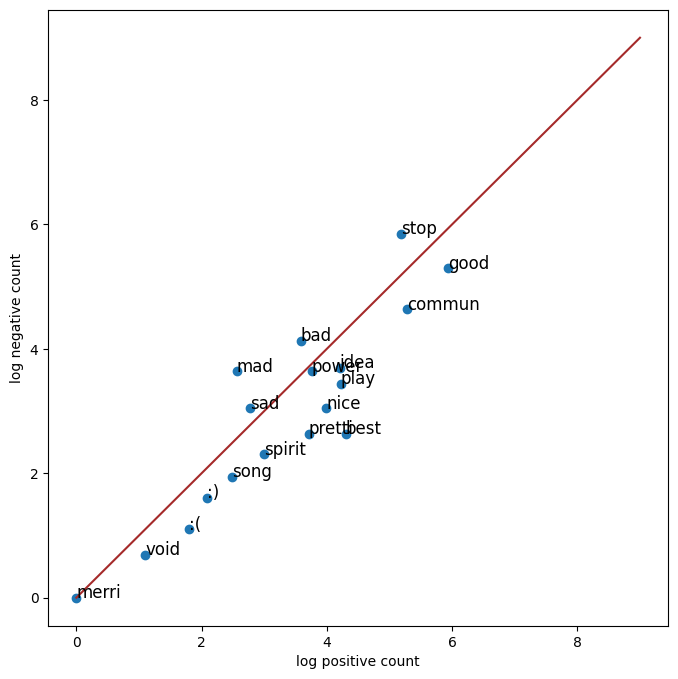

In [66]:
# Create a scatter plot to visualize word sentiment patterns
# Set figure size to 8x8 inches
fig, ax = plt.subplots(figsize=(8,8))

# Convert positive counts to log scale to handle large variations
# Add 1 before taking log to avoid log(0)
# x-axis represents log of positive sentiment counts
x = np.log([x[1] + 1 for x in data])

# Convert negative counts to log scale similarly
# y-axis represents log of negative sentiment counts  
y = np.log([x[2] + 1 for x in data])

# Create scatter plot of log positive vs negative counts
# Each point represents a word's positive/negative sentiment frequency
ax.scatter(x, y)  

# Label the axes
plt.xlabel("log positive count") 
plt.ylabel("log negative count")

# Add word labels to each point
# Loop through data points and annotate with corresponding word
for z in range(0, len(data)):
    ax.annotate(data[z][0], (x[z],y[z]), fontsize=12)

# Add diagonal line y=x in brown color
# Words above this line appear more in negative contexts
# Words below this line appear more in positive contexts
ax.plot([0, 9], [0, 9], color = 'brown')

# Display the plot
plt.show()

In [67]:
# Convert positive sentiment counts to log scale (adding 1 to avoid log(0))
x = np.log([x[1]+1 for x in data])

# Print both x and y arrays which contain the log-transformed 
# positive and negative sentiment counts respectively
print("Log positive counts:", x)
print("Log negative counts:", y)

[1.09861229 5.27811466 2.99573227 5.18738581 0.         3.98898405
 5.9348942  3.58351894 2.77258872 2.56494936 4.30406509 3.71357207
 2.07944154 1.79175947 2.48490665 4.20469262 3.76120012 4.21950771] [0.69314718 4.63472899 2.30258509 5.84932478 0.         3.04452244
 5.29330482 4.12713439 3.04452244 3.63758616 2.63905733 2.63905733
 1.60943791 1.09861229 1.94591015 3.68887945 3.63758616 3.4339872 ]


In [70]:
def extract_features(tweet, freqs):
    """
    Function to extract features from a tweet for sentiment analysis.
    
    Parameters:
        tweet: A list of words representing one tweet
        freqs: A dictionary containing frequencies of (word, label) tuples
               where label is 1.0 for positive sentiment and 0.0 for negative
    
    Returns:
        x: A feature vector of shape (1,3) containing:
           - x[0,0]: Bias term (always 1)
           - x[0,1]: Sum of frequencies of words appearing in positive context
           - x[0,2]: Sum of frequencies of words appearing in negative context
    """
    # Clean the tweet by tokenizing, stemming and removing stopwords
    word_l = clean_tweet(tweet)
    
    # Initialize feature vector of shape (1,3) with zeros
    x = np.zeros((1,3))
    
    # Set bias term (first element) to 1
    x[0,0] = 1
    
    # For each word in cleaned tweet
    for word in word_l:
        # Add frequency of word in positive context (label=1.0)
        # If word not found in freqs dict, default to 0
        x[0,1] += freqs.get((word, 1.0), 0)
        
        # Add frequency of word in negative context (label=0.0)
        # If word not found in freqs dict, default to 0
        x[0,2] += freqs.get((word, 0.0), 0)
    
    # Verify feature vector has correct shape
    assert(x.shape == (1,3))
    
    return x

In [71]:
# Create a feature vector x of shape (1,3) initialized with zeros
# Example:
# x = [[0. 0. 0.]] - A 1x3 matrix/array filled with zeros
#     |  |  |
#     |  |  └── Will store sum of negative frequencies
#     |  └────── Will store sum of positive frequencies  
#     └──────── Bias term (will be set to 1)
x = np.zeros((1,3))

# Set the bias term (first element) to 1
# This serves as the intercept term in our model
x[0][0] = 1

# Print the feature vector and its shape
# Expected output: [[1. 0. 0.]] (1, 3)
# - First value is bias term (1)
# - Second value will store sum of positive frequencies 
# - Third value will store sum of negative frequencies
print(x,x.shape)

[[1. 0. 0.]] (1, 3)


In [72]:
# Get the first tweet from training data
train_x = training_tweets

# Extract features for the first tweet using extract_features()
# This will return a 1x3 feature vector where:
# - First element is bias term (1)
# - Second element is sum of frequencies of words in positive context
# - Third element is sum of frequencies of words in negative context
temp1 = extract_features(train_x[0], freqs)

# Print the feature vector for the first tweet
print(temp1)

[[1.000e+00 2.515e+03 2.252e+03]]


In [73]:
# Create feature vector for a test string containing negative sentiment words
# "bad mad stop sad" contains words that appear more frequently in negative context
temp2 = extract_features("bad mad stop sad", freqs)

# Print the resulting feature vector
# Expected output will be a 1x3 array where:
# - First element is bias term (1)
# - Second element is sum of positive frequencies for these words
# - Third element is sum of negative frequencies for these words
# The third element should be larger since these are negative words
print(temp2)

[[  1. 240. 464.]]


In [74]:
# Preparing training data by creating feature matrix X and label vector Y

# Initialize feature matrix X with zeros
# Shape is (num_tweets x 3) where:
# - Column 1: Bias term (1)
# - Column 2: Sum of positive frequencies
# - Column 3: Sum of negative frequencies
X = np.zeros((len(train_x),3))

# Extract features for each training tweet
for i in range(len((train_x))):
    # Get feature vector for tweet i and store as row i in matrix X
    X[i,:] = extract_features(train_x[i], freqs)
    
# Create training labels vector Y
# First append ones (positive class) for positive tweets
# Then append zeros (negative class) for negative tweets
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)

# Flatten 2D array into 1D array for training
# Use C-style ordering to preserve order of elements
Y = np.ravel(train_y,order='C')

# Print training labels
print(train_y)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [75]:
# Using Logistic Regression for Sentiment Classification
# Logistic Regression is one of the most basic but effective models for binary classification
# It works by learning weights for each feature to predict probability of positive class

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create and train logistic regression model:
# - clf = classifier instance
# - fit() trains model on:
#   - X: Feature matrix with bias term and frequency sums
#   - Y: Binary labels (1 for positive, 0 for negative)
clf = LogisticRegression().fit(X,Y)

# Evaluate model performance on training data
# score() returns accuracy = correct predictions / total predictions
print("Training Accuracy:" , clf.score(X,Y))

Training Accuracy: 0.6170474516695957


In [76]:
# Import LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Create LogisticRegression classifier and fit it to training data
# X contains feature matrix with bias term and word frequencies
# Y contains binary labels (1 for positive, 0 for negative sentiment)
clf = LogisticRegression().fit(X,Y)

# Calculate accuracy score on training data
# This measures the proportion of correct predictions
# Output of 0.617 means model correctly predicts sentiment ~62% of the time
clf.score(X,Y)

0.6170474516695957

In [77]:
# Testing the model's performance on unseen test data
# Combine positive and negative test tweets into one list
testing_times = positive_test + negative_test

# Create feature matrix for test data with same dimensions as training
# Each row will contain bias term and word frequencies for a tweet
X1 = np.zeros((len(testing_times),3))

# Extract features for each test tweet using same frequency dictionary
for i in range(len((testing_times))):
    X1[i,:] = extract_features(testing_times[i], freqs)
    
# Create test labels vector:
# - Append ones (positive class) for positive test tweets
# - Append zeros (negative class) for negative test tweets
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
# Flatten 2D array to 1D for evaluation
Y1 = np.ravel(test_y,order='C')

# Calculate and print accuracy on test set
# This measures model's ability to generalize to new data
print(f'The test accuracy is : {clf.score(X1,Y1)}')

The test accuracy is : 0.607167955024596


In [ ]:
# Create feature matrix X1 for test data
# Shape is (num_test_tweets, 3) where:
# - num_test_tweets = len(testing_times) = total number of test tweets
# - 3 columns for the features (bias term + 2 word frequency features)
# Initialize matrix with all zeros using np.zeros()
X1 = np.zeros((len(testing_times),3))

# Print the empty feature matrix to verify shape
print(X1)

In [79]:
# Function to predict sentiment of a custom tweet
# Takes a tweet string and frequency dictionary as input
def predict_custom_tweet(tweet, freqs):
    # Extract features from the tweet using the same feature extraction as training
    x = extract_features(tweet, freqs)
    # Reshape features to 2D array with shape (1, n_features) as required by sklearn
    x = x.reshape(1, -1)  
    # Use trained logistic regression model to predict sentiment
    # Returns 1 for positive sentiment, 0 for negative
    y_pred = clf.predict(x)[0]  
    return y_pred
    
# Test the prediction function on some example tweets
# List contains tweets with different sentiments to test model performance
# Color codes: Green for expected positive, Red for expected negative, Yellow for ambiguous
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over',  # Positive sentiment
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding',  # Negative sentiment
                  '\033[92m'+'Government efforts are great.',  # Positive sentiment
                  '\033[93m'+'Nonsense', # Ambiguous/neutral sentiment
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus',  # Negative sentiment
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']  # Positive sentiment

# Loop through each tweet, predict its sentiment, and print result
# Prediction of 1.0 indicates positive sentiment, 0.0 indicates negative
for tweet in list_of_tweets:
    prediction = predict_custom_tweet(tweet, freqs)
    print('%s -> %.6f' % (tweet, prediction))

Thank God coronovirus is over -> 1.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 1.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000
